<a href="https://colab.research.google.com/github/Wondav/Data-Analysis/blob/main/Data_Cleaning_%26_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Cleaning and Preparation: Finance Company Loan Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.impute import KNNImputer

In [3]:
data=pd.read_csv('train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Categorical Variables Encoding**

In [4]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0}, na_action=None)
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0}, na_action=None)
data['Married']=data['Married'].map({'Yes':1,'No':0}, na_action=None)
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0}, na_action=None)
data['Property_Area']=data['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}, na_action=None)
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0}, na_action=None)
data['Dependents']=data['Dependents'].map({'0':0,'1':1,'2':2,'3+':3}, na_action=None)

In [5]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 62.5+ KB


**Handling Missing Values**\
Using KNNImputer to fill in missing value

In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

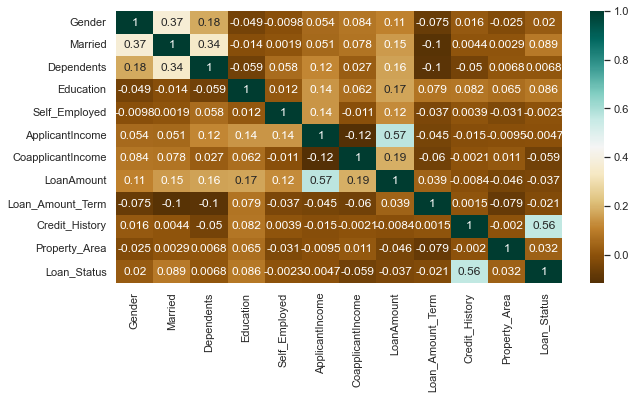

In [8]:
plt.figure(figsize=(10,5))
c=data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

In [9]:
impute=KNNImputer()
data1=pd.DataFrame(impute.fit_transform(data.drop('Loan_ID',axis=1)),columns=['Gender','Married','Dependents','Education','Self_Employed',
                                                                              'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
                                                                              'Credit_History','Property_Area','Loan_Status'])
data1['Loan_ID']=data['Loan_ID']

In [10]:
data1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Loan_ID              0
dtype: int64

For Categorical Columns, KNNImputer imputes values beween the actual values e.g Binary columns now contain values such as 0.6,0.8 instead of 1 and 0, so we'll round them up and down as required

In [11]:
print(data1.Married.value_counts())
print(data1.Dependents.value_counts())

1.0    399
0.0    213
0.6      1
0.8      1
Name: Married, dtype: int64
0.0    346
1.0    105
2.0    101
3.0     51
1.2      4
0.8      2
1.6      2
0.4      2
0.2      1
Name: Dependents, dtype: int64


In [12]:
data1=data1.round()

**Outlier Treatment and Detection**\
 Values greater than 95th percentile and less than 5th percentile are considered Outliers\
 I will be replacing them with the 95th and 5th percentile respectively

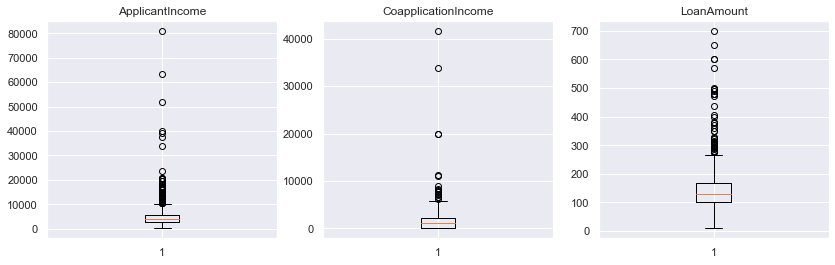

In [13]:
fig,ax=plt.subplots(1,3,figsize=(14,4))
ax[0].boxplot(data1['ApplicantIncome'])
ax[0].set_title('ApplicantIncome')
ax[1].boxplot(data1['CoapplicantIncome'])
ax[1].set_title('CoapplicationIncome')
ax[2].boxplot(data1['LoanAmount'])
ax[2].set_title('LoanAmount')
plt.show()

In [14]:
def outlier_remover(col):
  Q3,Q1=data1[col].quantile(0.95),data[col].quantile(0.25)
  IQR=Q3-Q1
  UL=IQR*1.5
  return np.where((data1[col]>Q3),Q3,data1[col])
data_cl=data1.copy()
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
  data_cl[i]=outlier_remover(i)

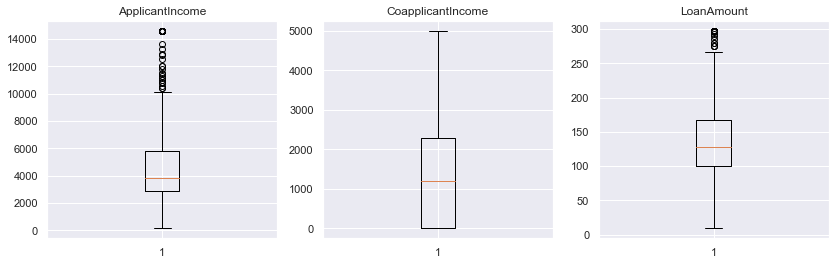

In [15]:
#cleaned data
fig,ax=plt.subplots(1,3,figsize=(14,4))
ax[0].boxplot(data_cl['ApplicantIncome'])
ax[0].set_title('ApplicantIncome')
ax[1].boxplot(data_cl['CoapplicantIncome'])
ax[1].set_title('CoapplicantIncome')
ax[2].boxplot(data_cl['LoanAmount'])
ax[2].set_title('LoanAmount')
plt.show()

In [16]:
data_cl.to_csv('data_cleaned.csv',index=False)

## **Summary**
1. I Used KNNImputer which identifies variables with close relationship to a 
variable and use them to produce values for missing spots in the data.
2. I used visualizations to identify outliers, and treated them through Capping and flooring them with the 95th and 5th percentiles respectively